# Author - Prajwal S S Reddy

## THE SPARKS FOUNDATION GRIP

## Task-2 Prediction using supervised ML

In [17]:
import pandas as pd
import numpy as np

In [18]:
iris_df = pd.read_csv("data/Iris.csv")
iris_df.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [19]:
iris_df.shape

(150, 6)

In [20]:
iris_df.drop(["Id"],axis=1,inplace  = True)

In [21]:
iris_df.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [22]:
#Checking for null values in iris dataset
iris_df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [25]:
#Droping duplicates in iris dataset
iris_df.drop_duplicates(inplace=True)
iris_df.shape

(147, 5)

In [38]:
# setting features dataset
x = iris_df.iloc[:,:-1]
#setting target varaible
y = iris_df.iloc[:,4]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 147, dtype: object

In [39]:
# preparing training and test dataset using sklearn test_train_split method
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

# printing the shape of the training and the test datasets
print('Number of rows and columns in the Training set X:', X_train.shape, 'and y:', y_train.shape)
print('Number of rows and columns in the Test set X:', X_test.shape, 'and y:', y_test.shape)

Number of rows and columns in the Training set X: (117, 4) and y: (117,)
Number of rows and columns in the Test set X: (30, 4) and y: (30,)


In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

In [52]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [53]:
y_pred = knn.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

In [47]:
y_pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [48]:
y_test

7          Iris-setosa
24         Iris-setosa
27         Iris-setosa
122     Iris-virginica
146     Iris-virginica
53     Iris-versicolor
45         Iris-setosa
22         Iris-setosa
114     Iris-virginica
26         Iris-setosa
42         Iris-setosa
80     Iris-versicolor
133     Iris-virginica
64     Iris-versicolor
73     Iris-versicolor
93     Iris-versicolor
16         Iris-setosa
56     Iris-versicolor
100     Iris-virginica
8          Iris-setosa
91     Iris-versicolor
39         Iris-setosa
148     Iris-virginica
86     Iris-versicolor
120     Iris-virginica
33         Iris-setosa
147     Iris-virginica
92     Iris-versicolor
85     Iris-versicolor
107     Iris-virginica
Name: Species, dtype: object

In [49]:
#finding best K value
scores = []
for i in range(1,16):
    knn1 = KNeighborsClassifier(n_neighbors=i)
    knn1.fit(X_train,y_train)
    y_pred1 = knn1.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred1))

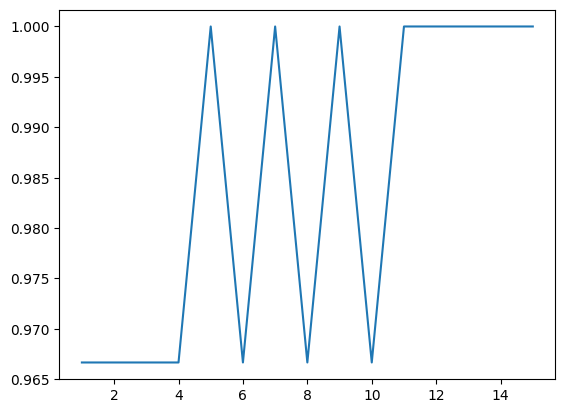

In [50]:
import matplotlib.pyplot as plt
plt.plot(range(1,16),scores)